In [2]:
#导入库
import warnings
warnings.filterwarnings('ignore')
import pydotplus
from sklearn.metrics import accuracy_score
from IPython.display import SVG
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import GridSearchCV,cross_val_score
import collections
from sklearn .preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,8)


In [3]:
#创建数据集，并对数据类别进行独热编码
def create_df(dic,feature_list):
    out =pd.DataFrame(dic)
    out = pd.concat([out,pd.get_dummies(out[feature_list])],axis = 1)
    out.drop(feature_list,axis=1, inplace =True)
    return out
#保证独热编码后的特征在训练和测试数据中同时存在
def intersect_features(train,test):
    common_feat = list(set(train.keys())&set(test.key()))
    return train[common_feat],test[common_feat]

In [4]:
features =['height','income','looks']
df_train ={}
df_train['height'] = ['tall','tall','tall','tall','short','short', 'short','short']
df_train['income'] = ['lot','lot','little','little','lot','lot','little','little']
df_train['looks']= ['handsome','repulsive','handsome','repulsive', 'handsome','repulsive','handsome','repulsive']
df_train['Outcome']=LabelEncoder().fit_transform( ['yes', 'yes', 'yes' , 'no' ,'yes', 'yes', 'no', 'no'])
df_train = create_df( df_train,features)
df_train

,Outcome,height_short,height_tall,income_little,income_lot,looks_handsome,looks_repulsive
0,1,False,True,False,True,True,False
1,1,False,True,False,True,False,True
2,1,False,True,True,False,True,False
3,0,False,True,True,False,False,True
4,1,True,False,False,True,True,False
5,1,True,False,False,True,False,True
6,0,True,False,True,False,True,False
7,0,True,False,True,False,False,True


In [5]:
df_test ={}
df_test['height']=['tall','short','talt']
df_test['income']=['little','lot','lot']
df_test['looks']=['handsome','handsome','replulsive']
df_test = create_df(df_test,features)
df_test

,height_short,height_tall,height_talt,income_little,income_lot,looks_handsome,looks_replulsive
0,False,True,False,True,False,True,False
1,True,False,False,False,True,True,False
2,False,False,True,False,True,False,True


In [6]:
y = df_train['Outcome']
# 定义决策树
dt = DecisionTreeClassifier(criterion= 'entropy', random_state= 17)
# 在训练集上训练决策树模型
dt.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [7]:
DecisionTreeClassifier(class_weight=None, criterion= 'entropy',
                       max_depth=None, max_features= None,
                       max_leaf_nodes= None, min_impurity_decrease= 0.1,
                       min_samples_leaf=1, min_samples_split= 2, min_weight_fraction_leaf= 0.1, random_state= 17)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.1,
                       min_weight_fraction_leaf=0.1, random_state=17)

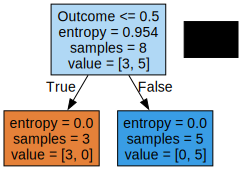

In [10]:
# 可视化决策树
tree_str = export_graphviz(dt, feature_names= df_train.columns,
                           out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(tree_str)
SVG(graph.create_svg())